In [ ]:
# Cai dat thu vien
from PIL import Image
from skimage.io import imread
import scipy.fftpack as fp
from scipy import ndimage
from skimage.color import rgb2gray
import matplotlib.pylab as pylab
import numpy as np

# ĐỊNH LÝ TÍCH CHẬP VÀ LÀM MỜ MIỀN TẦN SỐ GAUSS

C:\Users\Admin\AppData\Local\Temp\ipykernel_16880\3007800512.py:63: ComplexWarning: Casting complex values to real discards the imaginary part
  fp.fftshift(freq))).astype(int))
C:\Users\Admin\AppData\Local\Temp\ipykernel_16880\3007800512.py:66: ComplexWarning: Casting complex values to real discards the imaginary part
  fp.fftshift(freq_kernel))).astype(int))
C:\Users\Admin\AppData\Local\Temp\ipykernel_16880\3007800512.py:68: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow( (20*np.log10( 0.1 + fp.fftshift(convolved))).astype(int))


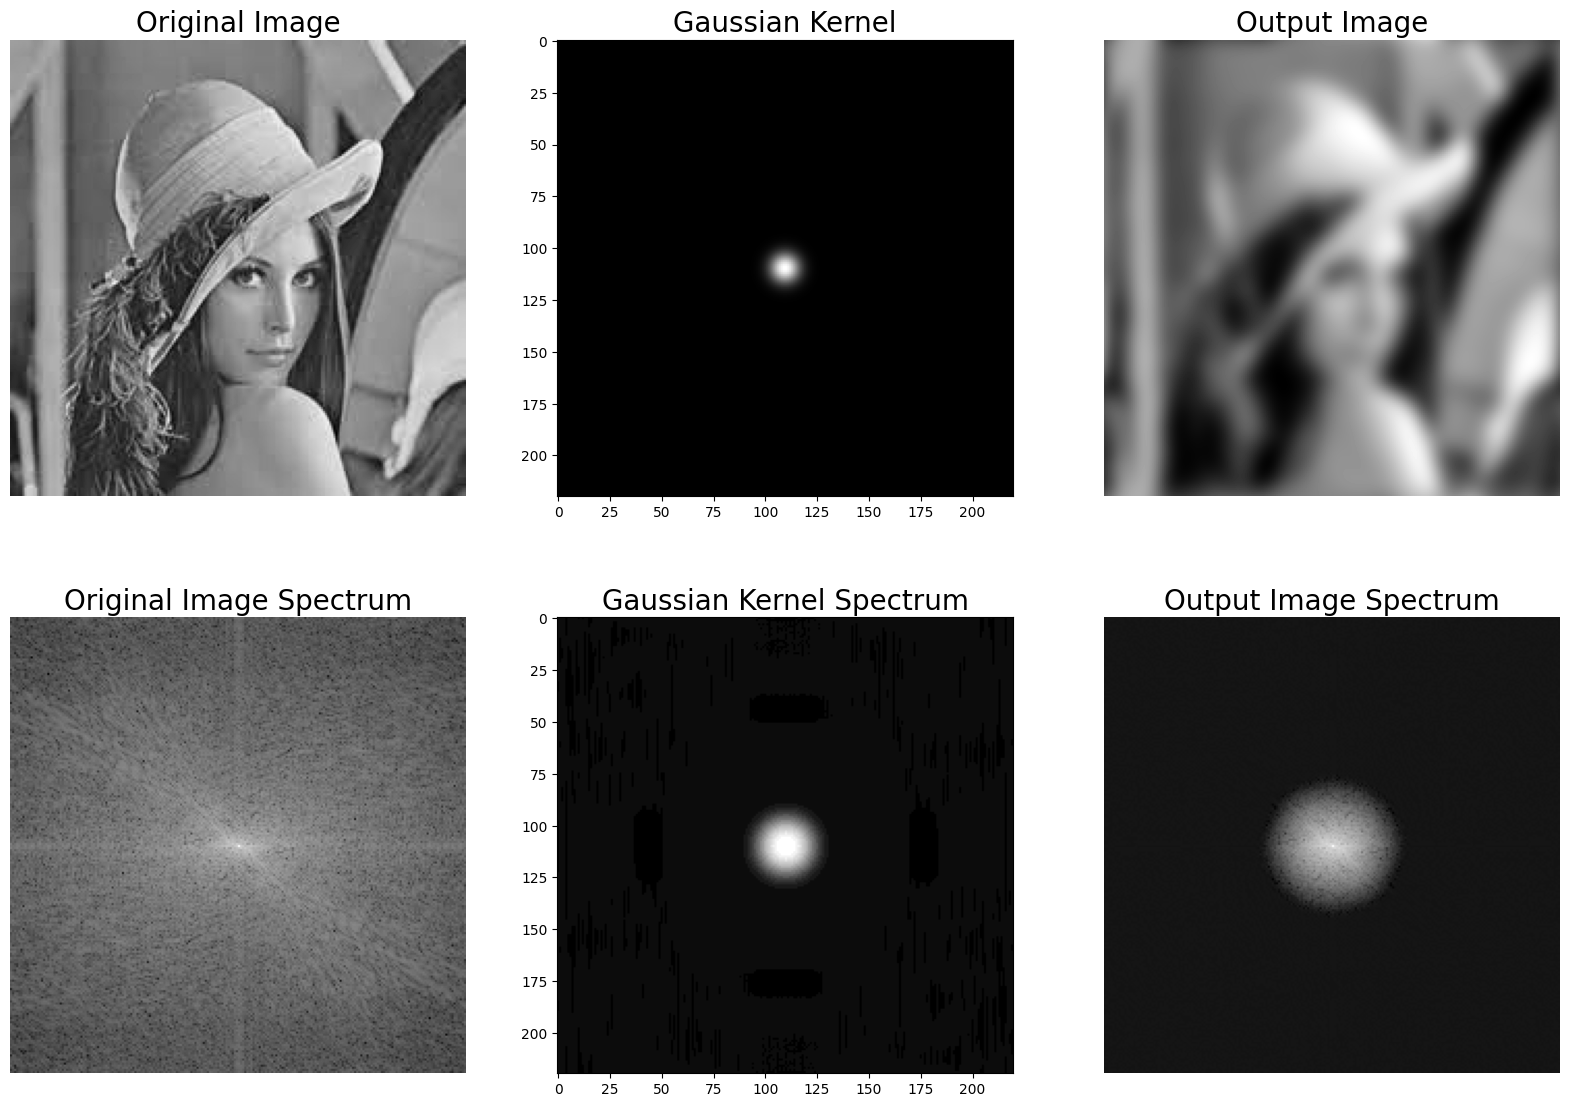

In [ ]:
def gaussian_kernel(size_x, size_y, sigma=5):
  """Create a Gaussian kernel."""
  x = np.linspace(-size_x // 2, size_x // 2, size_x)
  y = np.linspace(-size_y // 2, size_y // 2, size_y)
  x, y = np.meshgrid(x, y)
  kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
  return kernel / kernel.sum()

pylab.figure(figsize=(20,15))
pylab.gray() # show the filtered result in grayscale
im = np.mean(imread('../images/lena.jpg'), axis=2)
gauss_kernel = gaussian_kernel(im.shape[0], im.shape[1], sigma=5)
freq = fp.fft2(im)
assert(freq.shape == gauss_kernel.shape)
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel))
convolved = freq*freq_kernel # by the convolution theorem, simply multiply in the frequency domain
im1 = fp.ifft2(convolved).real
pylab.subplot(2,3,1), pylab.imshow(im), pylab.title('Original Image',
size=20), pylab.axis('off')
pylab.subplot(2,3,2), pylab.imshow(gauss_kernel), pylab.title('Gaussian Kernel', size=20)
pylab.subplot(2,3,3), pylab.imshow(im1) # the imaginary part is an artifact
pylab.title('Output Image', size=20), pylab.axis('off')
pylab.subplot(2,3,4), pylab.imshow( (20*np.log10( 0.1 +
fp.fftshift(freq))).astype(int))
pylab.title('Original Image Spectrum', size=20), pylab.axis('off')
pylab.subplot(2,3,5), pylab.imshow( (20*np.log10( 0.1 +
fp.fftshift(freq_kernel))).astype(int))
pylab.title('Gaussian Kernel Spectrum', size=20), pylab.subplot(2,3,6)
pylab.imshow( (20*np.log10( 0.1 + fp.fftshift(convolved))).astype(int))
pylab.title('Output Image Spectrum', size=20), pylab.axis('off')
pylab.subplots_adjust(wspace=0.2, hspace=0)
pylab.show()

# LỌC TRONG MIỀN TẦN SỐ (HPF, LPF, BPF, và NOTCH FILTERS)


### HIGH-PASS FILTER (HPF)


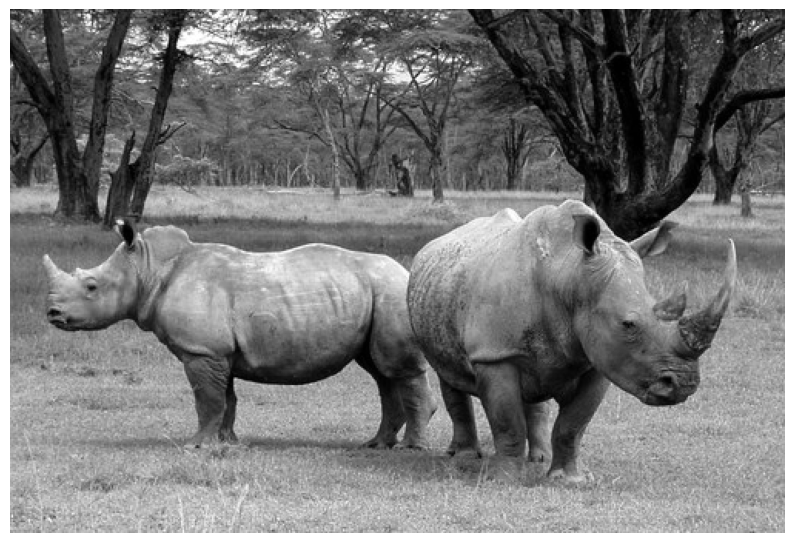

((np.float64(-0.5), np.float64(502.5), np.float64(339.5), np.float64(-0.5)),
 None)

In [ ]:
im = np.array(Image.open('../images/rhino.jpg').convert('L'))
pylab.figure(figsize=(10,10)), pylab.imshow(im, cmap=pylab.cm.gray),
pylab.axis('off'), pylab.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16880\3170006229.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.figure(figsize=(10,10)), pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int)), pylab.show()


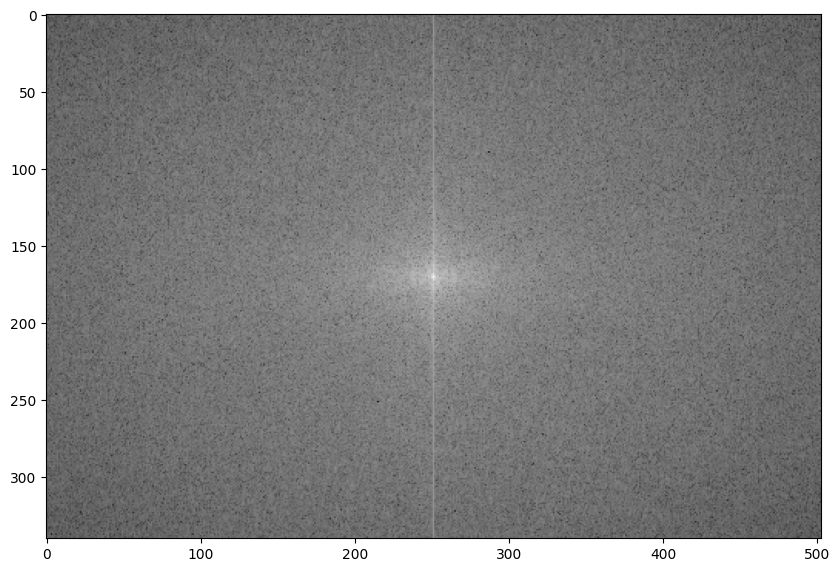

(<Figure size 1000x1000 with 1 Axes>,
 None)

In [ ]:
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
freq1 = np.copy(freq)
freq2 = fp.fftshift(freq1)
pylab.figure(figsize=(10,10)), pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int)), pylab.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16880\457694996.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))


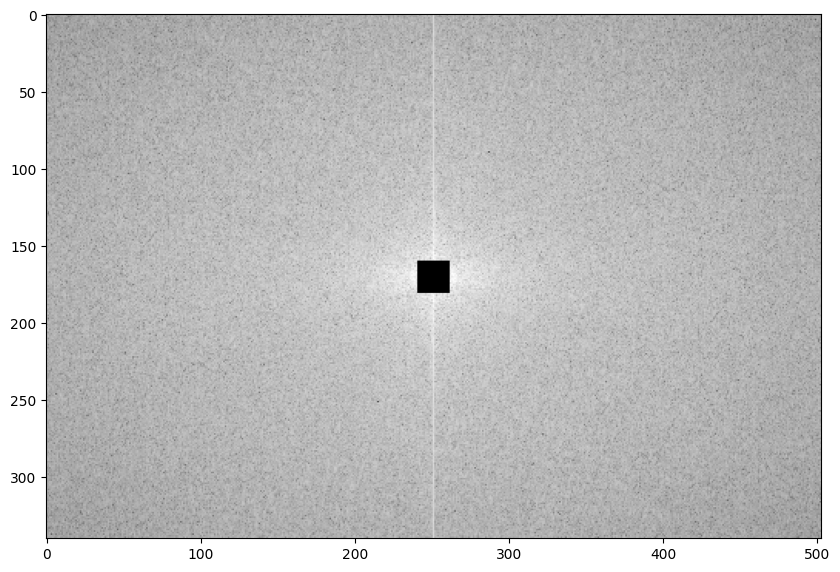

In [ ]:
# apply HPF
freq2[half_w-10:half_w+11,half_h-10:half_h+11] = 0 
# select all but the first 20x20 (low) frequencies
pylab.figure(figsize=(10,10))
pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))
pylab.show()

0.5900850483418348


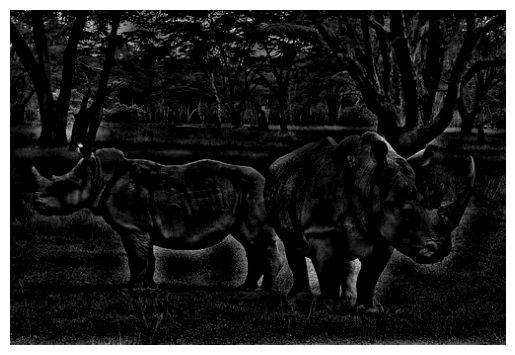

(<matplotlib.image.AxesImage at 0x22a2bd689d0>,
 (np.float64(-0.5), np.float64(502.5), np.float64(339.5), np.float64(-0.5)),
 None)

In [12]:
import scipy.fft as fftpack
def signaltonoise(a, axis=0, ddof=0):
  mean = np.mean(a, axis=axis)
  std_dev = np.std(a, axis=axis, ddof=ddof)
  return np.where(std_dev == 0, 0, mean / std_dev)

im1 = np.clip(fp.ifft2(fftpack.ifftshift(freq2)).real,0,255) 
# clip pixel values after IFFT
print(signaltonoise(im1, axis=None))
# 0.5901647786775175
pylab.imshow(im1, cmap='gray'), pylab.axis('off'), pylab.show()

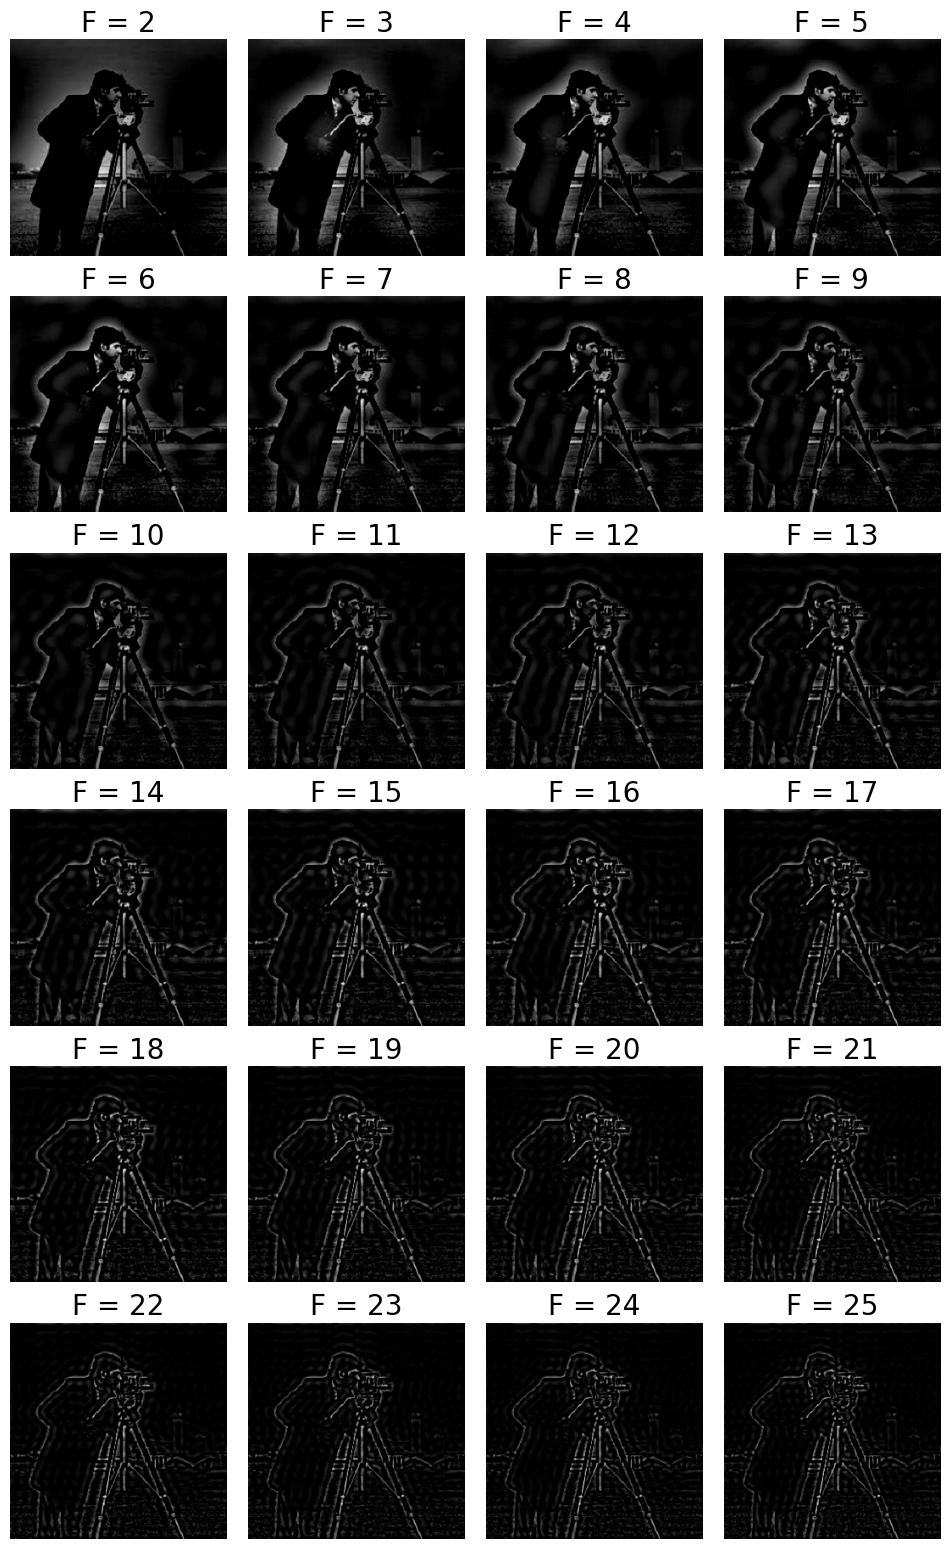

In [ ]:
from scipy import fftpack
im = np.array(Image.open('../images/cameraman.jpg').convert('L'))
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
snrs_hp = []
lbs = list(range(1,25))
pylab.figure(figsize=(12,20))

for l in lbs:
  freq1 = np.copy(freq)
  freq2 = fftpack.fftshift(freq1)
  freq2[half_w-l:half_w+l+1,half_h-l:half_h+l+1] = 0 # select all but the first lxl (low) frequencies
  im1 = np.clip(fp.ifft2(fftpack.ifftshift(freq2)).real,0,255) # clip pixel values after IFFT
  snrs_hp.append(signaltonoise(im1, axis=None))
  pylab.subplot(6,4,l), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
  pylab.title('F = ' + str(l+1), size=20)
pylab.subplots_adjust(wspace=0.1, hspace=0)
pylab.show()

### CÁCH SNR THAY ĐỔI VỚI FREQUENCY CUT-OFF



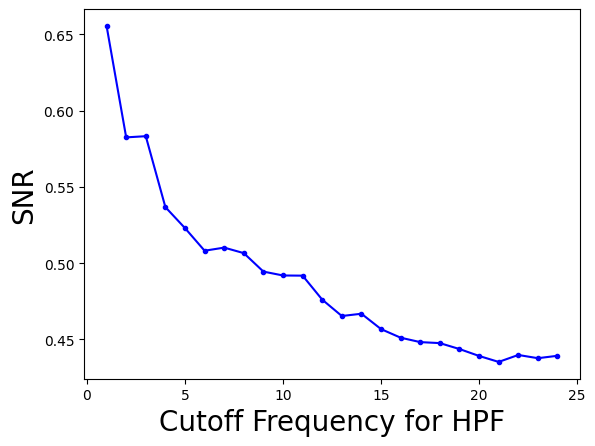

In [14]:
pylab.plot(lbs, snrs_hp, 'b.-')
pylab.xlabel('Cutoff Frequency for HPF', size=20)
pylab.ylabel('SNR', size=20)
pylab.show()

### BỘ LỌC THÔNG THẤP (LOW-PASS FILTER - LPF)

#### LPF VỚI SCIPY NDIMAGE VÀ NUMPY FFT



#### LPF VỚI FOURIER_GAUSSIAN



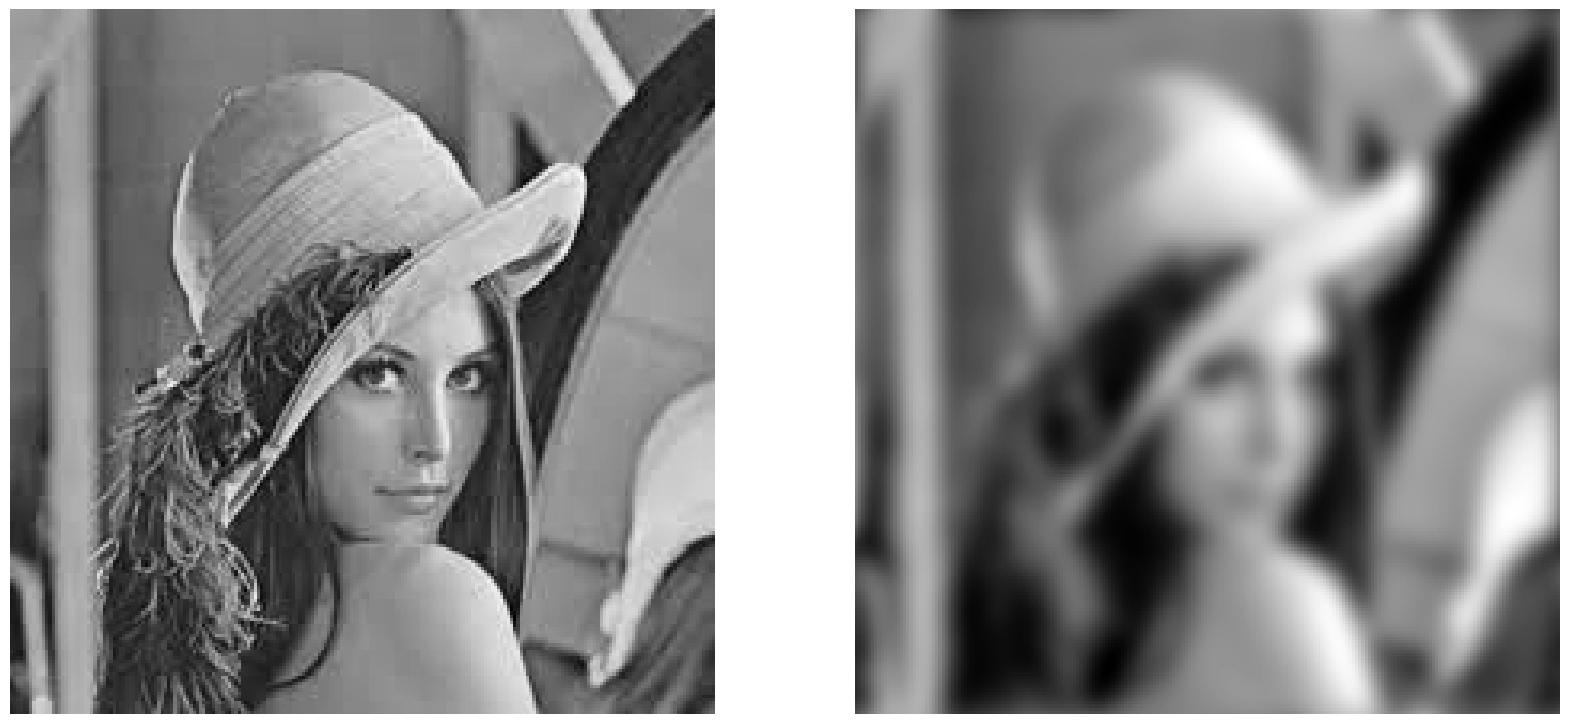

In [15]:
import numpy.fft as fp
fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20,10))
pylab.gray() # show the result in grayscale
im = np.mean(imread('../images/lena.jpg'), axis=2)
freq = fp.fft2(im)
freq_gaussian = ndimage.fourier_gaussian(freq, sigma=4)
im1 = fp.ifft2(freq_gaussian)
axes1.imshow(im), axes1.axis('off'), axes2.imshow(im1.real) # the imaginary part is an artifact
axes2.axis('off')
pylab.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16880\3182497831.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  numpy.fft.fftshift(freq_gaussian))).astype(int))


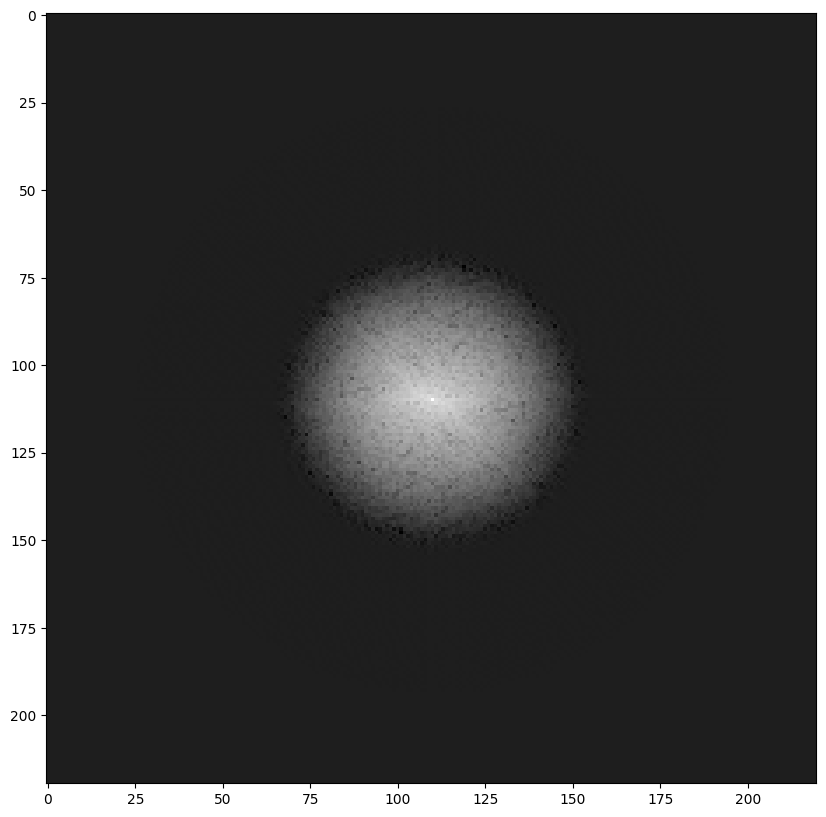

In [16]:
import numpy
pylab.figure(figsize=(10,10))
pylab.imshow( (20*np.log10( 0.1 +
numpy.fft.fftshift(freq_gaussian))).astype(int))
pylab.show()

#### LPF VỚI SCIPY FFTPACK


2.39908689036964


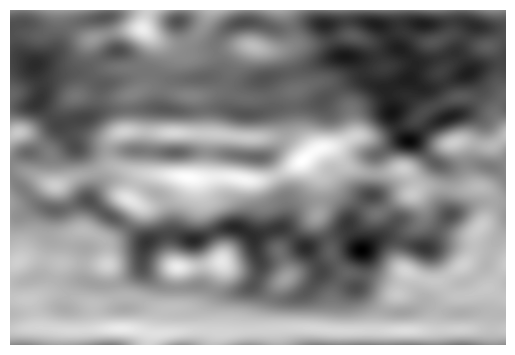

In [17]:
from scipy import fftpack
im = np.array(Image.open('../images/rhino.jpg').convert('L'))
# low pass filter
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
freq1 = np.copy(freq)
freq2 = fftpack.fftshift(freq1)
freq2_low = np.copy(freq2)
freq2_low[half_w-10:half_w+11,half_h-10:half_h+11] = 0 # block the lowfrequencies
freq2 -= freq2_low # select only the first 20x20 (low) frequencies, block the high frequencies
im1 = fp.ifft2(fftpack.ifftshift(freq2)).real
print(signaltonoise(im1, axis=None))
# 2.389151856495427
pylab.imshow(im1, cmap='gray'), pylab.axis('off')
pylab.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16880\2084392033.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))


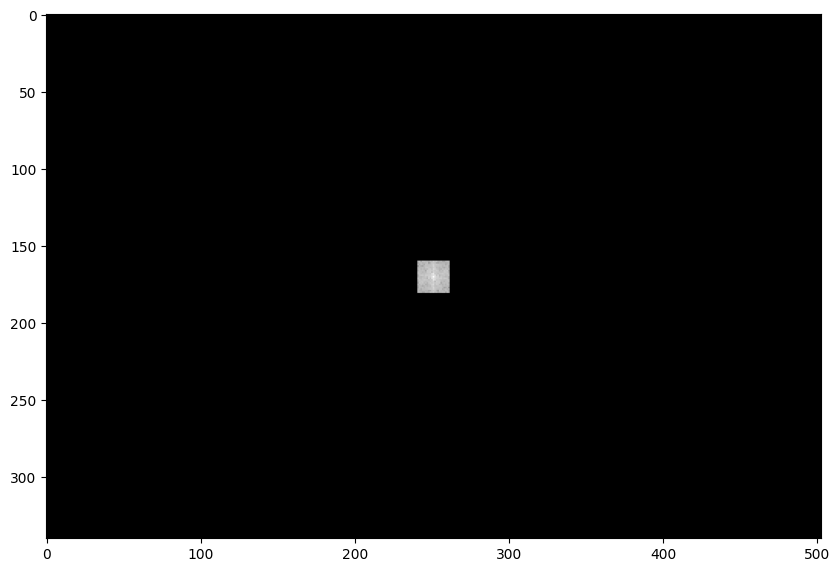

In [18]:
pylab.figure(figsize=(10,10))
pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))
pylab.show()

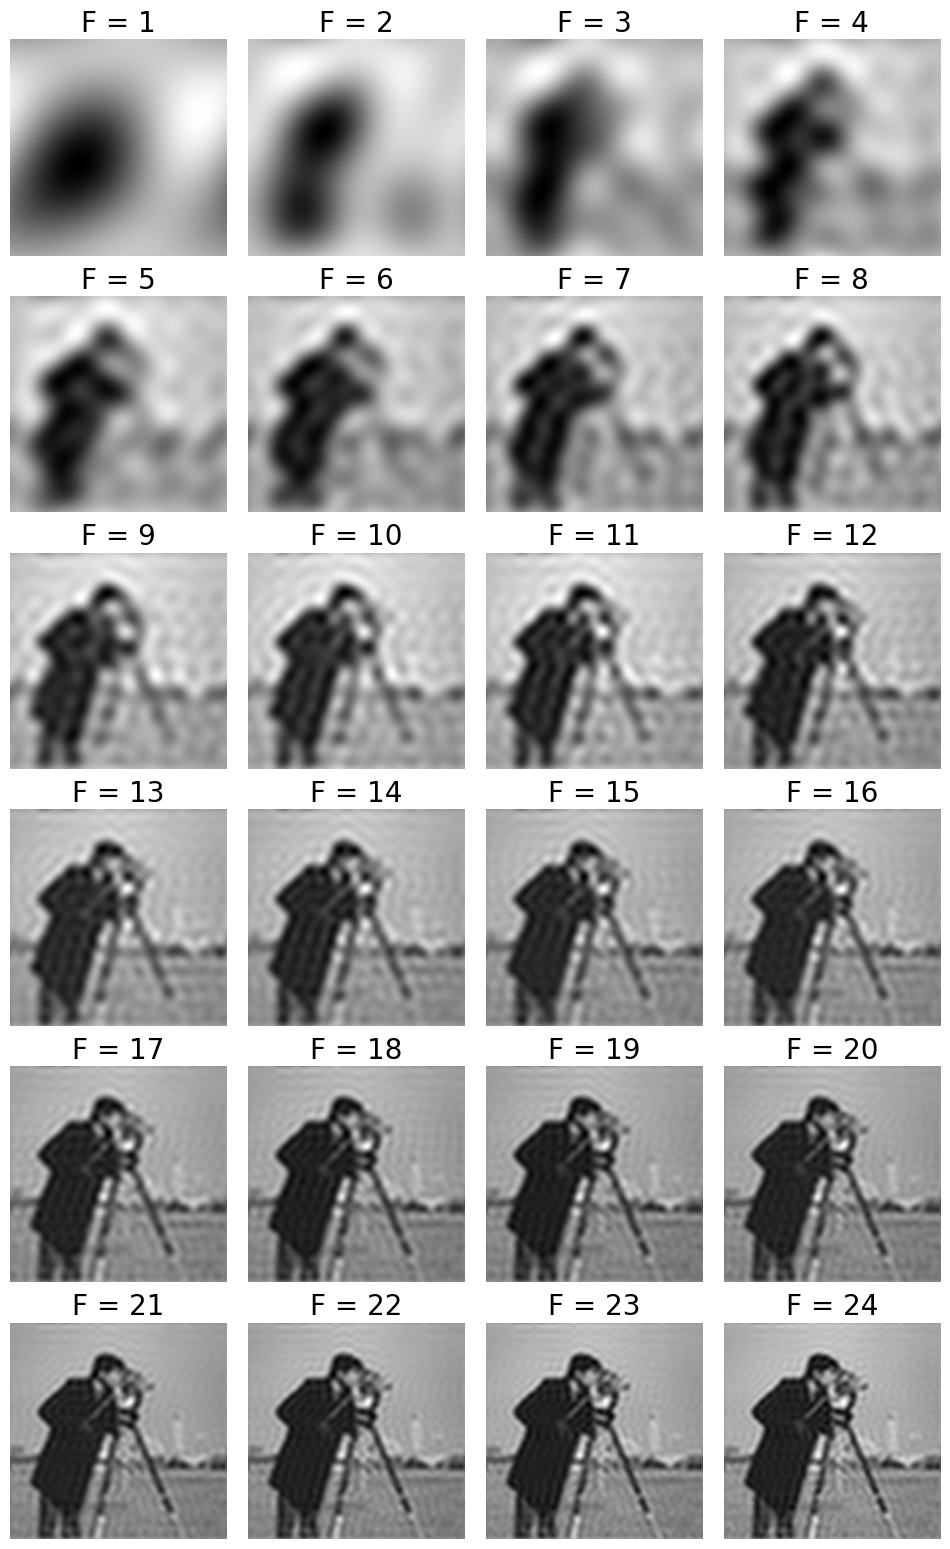

In [19]:
im = np.array(Image.open('../images/cameraman.jpg').convert('L'))
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
snrs_lp = []
ubs = list(range(1,25))
pylab.figure(figsize=(12,20))
for u in ubs:
  freq1 = np.copy(freq)
  freq2 = fftpack.fftshift(freq1)
  freq2_low = np.copy(freq2)
  freq2_low[half_w-u:half_w+u+1,half_h-u:half_h+u+1] = 0
  freq2 -= freq2_low # select only the first 20x20 (low) frequencies
  im1 = fp.ifft2(fftpack.ifftshift(freq2)).real
  snrs_lp.append(signaltonoise(im1, axis=None))
  pylab.subplot(6,4,u), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
  pylab.title('F = ' + str(u), size=20)
pylab.subplots_adjust(wspace=0.1, hspace=0)
pylab.show()

#### SNR THAY ĐỔI THẾ NÀO VỚI TẦN SỐ CUTOFF


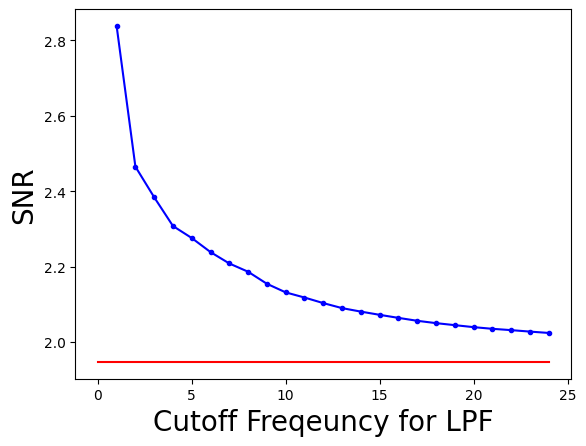

In [20]:
snr = signaltonoise(im, axis=None)
pylab.plot(ubs, snrs_lp, 'b.-')
pylab.plot(range(25), [snr]*25, 'r-')
pylab.xlabel('Cutoff Freqeuncy for LPF', size=20)
pylab.ylabel('SNR', size=20)
pylab.show()

# KHÔI PHỤC HÌNH ẢNH

## GIẢI TÍCH CHẬP VÀ LỌC NGƯỢC VỚI FFT

In [24]:
im = 255*rgb2gray(imread('../images/lena.jpg'))
gauss_kernel = np.outer(windows.gaussian(im.shape[0], 3),
windows.gaussian(im.shape[1], 3))
freq = fp.fft2(im)
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel)) # this is our H
convolved = freq*freq_kernel # by convolution theorem
im_blur = fp.ifft2(convolved).real
im_blur = 255 * im_blur / np.max(im_blur) # normalize

243.83080000000004 255.0


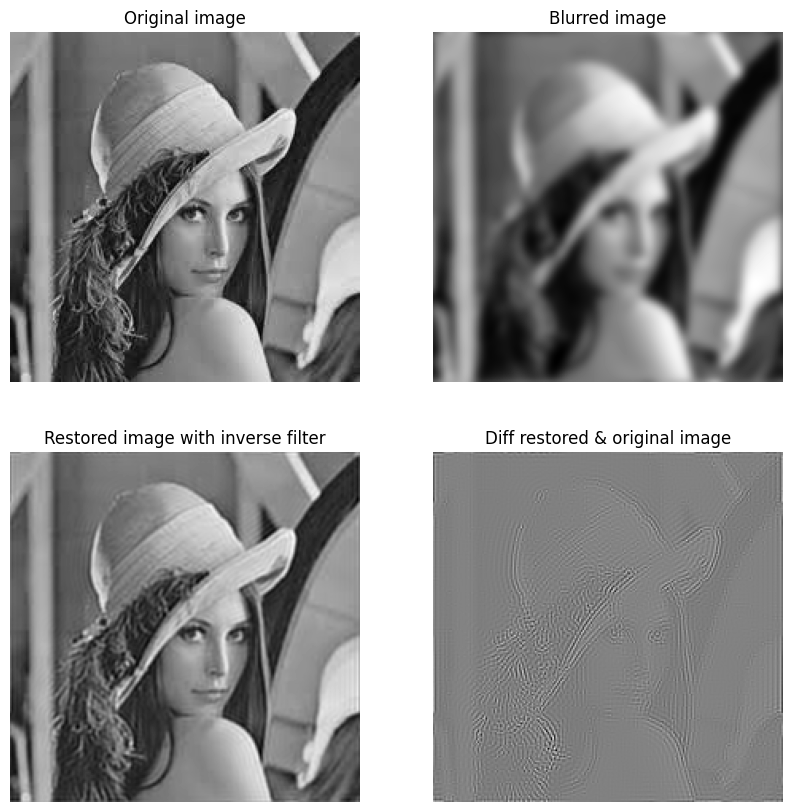

In [25]:
epsilon = 10**-6
freq = fp.fft2(im_blur)
freq_kernel = 1 / (epsilon + freq_kernel) # avoid division by zero
convolved = freq*freq_kernel
im_restored = fp.ifft2(convolved).real
im_restored = 255 * im_restored / np.max(im_restored)
print(np.max(im), np.max(im_restored))
pylab.figure(figsize=(10,10))
pylab.gray()
pylab.subplot(221), pylab.imshow(im), pylab.title('Original image'),
pylab.axis('off')
pylab.subplot(222), pylab.imshow(im_blur), pylab.title('Blurred image'),
pylab.axis('off')
pylab.subplot(223), pylab.imshow(im_restored), pylab.title('Restored image with inverse filter'), pylab.axis('off')
pylab.subplot(224), pylab.imshow(im_restored - im), pylab.title('Diff restored & original image'), pylab.axis('off')
pylab.show()

## GIẢI TÍCH CHẬP HÌNH ẢNH VỚI BỘ LỌC WIENER

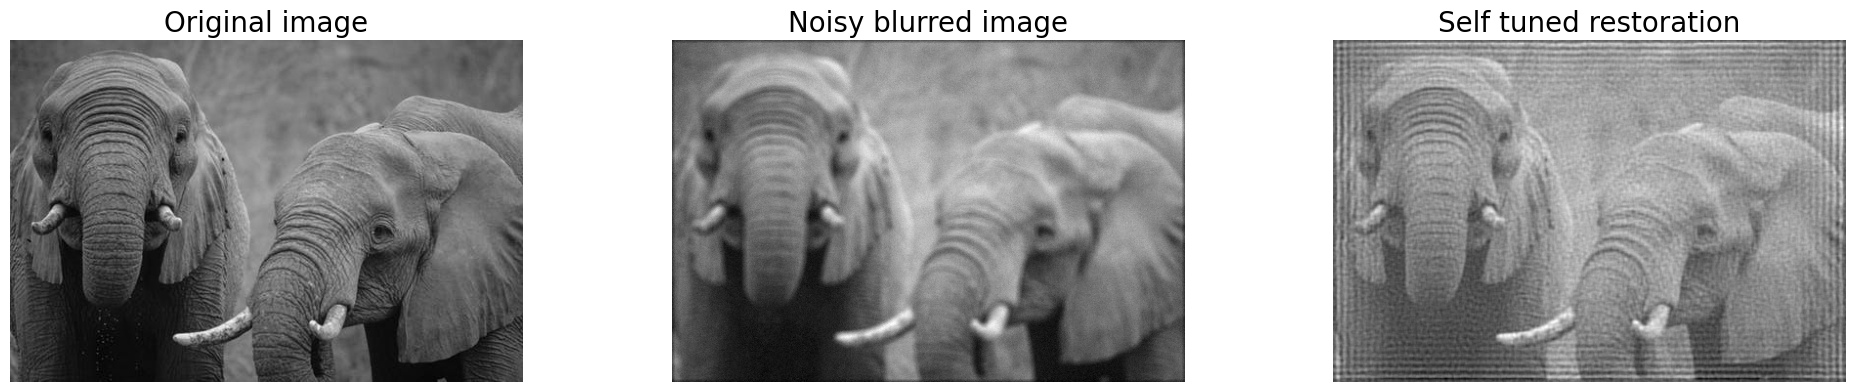

In [27]:
from skimage import color, data, restoration
im = color.rgb2gray(imread('../images/elephant_g.jpg'))
from scipy.signal import convolve2d as conv2
n = 7
psf = np.ones((n, n)) / n**2
im1 = conv2(im, psf, 'same')
im1 += 0.1 * np.std(im1) * np.random.standard_normal(im.shape)
im2, _ = restoration.unsupervised_wiener(im1, psf)
fig, axes = pylab.subplots(nrows=1, ncols=3, figsize=(20, 4), sharex=True,
sharey=True)
pylab.gray()
axes[0].imshow(im), axes[0].axis('off'), axes[0].set_title('Original image', size=20)
axes[1].imshow(im1), axes[1].axis('off'), axes[1].set_title('Noisy blurred image', size=20)
axes[2].imshow(im2), axes[2].axis('off'), axes[2].set_title('Self tuned restoration', size=20)
fig.tight_layout()
pylab.show()

### KHỬ NHIỄU ẢNH VỚI FFT


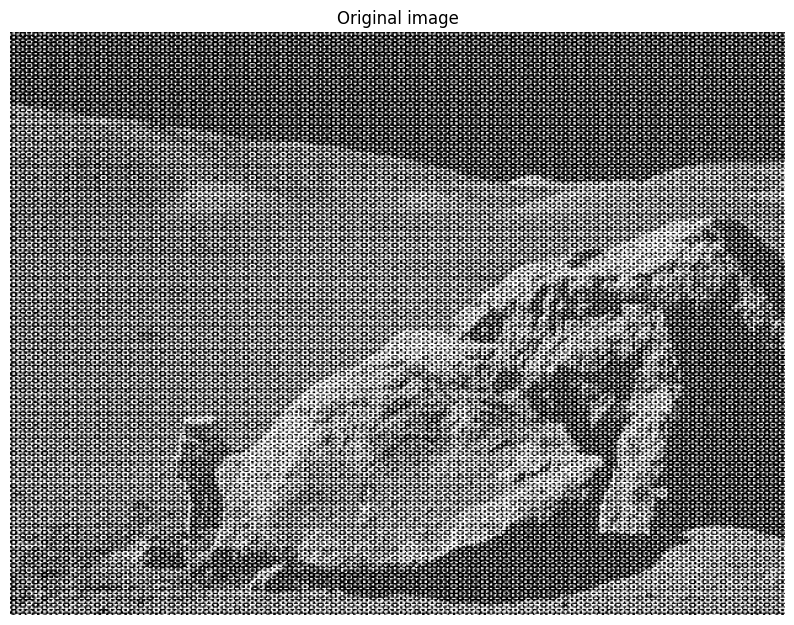

In [ ]:
'''Hình ảnh đầu ra là ảnh nhiễu'''
im = pylab.imread('../images/moonlanding.png').astype(float)
pylab.figure(figsize=(10,10))
pylab.imshow(im, pylab.cm.gray), pylab.axis('off'), pylab.title('Original image')
pylab.show()

Text(0.5, 1.0, 'Spectrum with Fourier transform')

<Figure size 640x480 with 0 Axes>

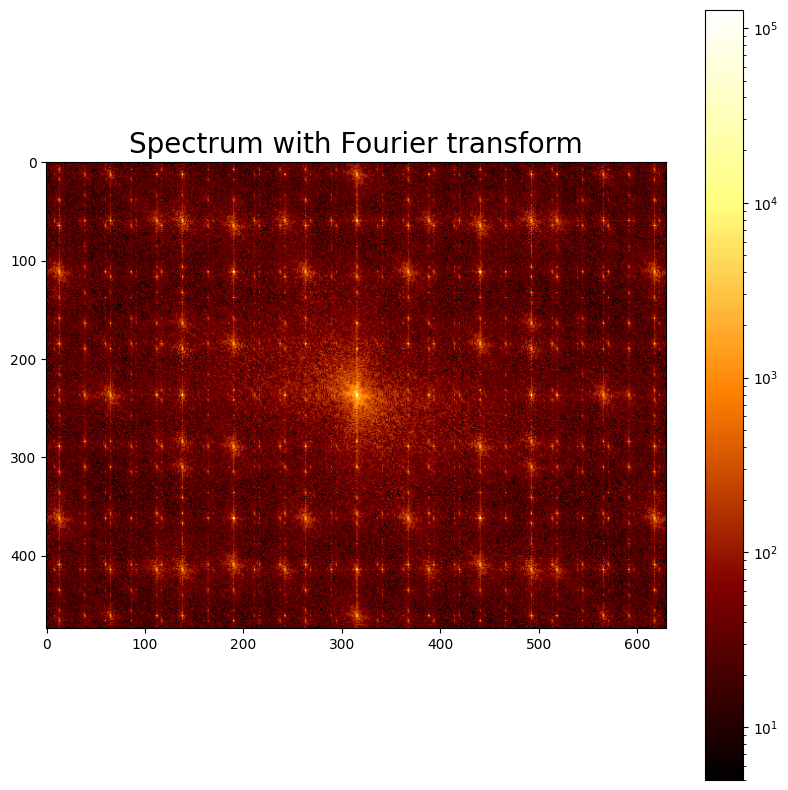

In [ ]:
from scipy import fftpack
from matplotlib.colors import LogNorm
im_fft = fftpack.fft2(im)
def plot_spectrum(im_fft):
  pylab.figure(figsize=(10,10))
  pylab.imshow(np.abs(im_fft), norm=LogNorm(vmin=5), cmap=pylab.cm.afmhot), pylab.colorbar()
pylab.figure(), plot_spectrum(fftpack.fftshift(im_fft))
pylab.title('Spectrum with Fourier transform', size=20)

### LỌC TRONG FFT


(None, Text(0.5, 1.0, 'Filtered Spectrum'))

<Figure size 640x480 with 0 Axes>

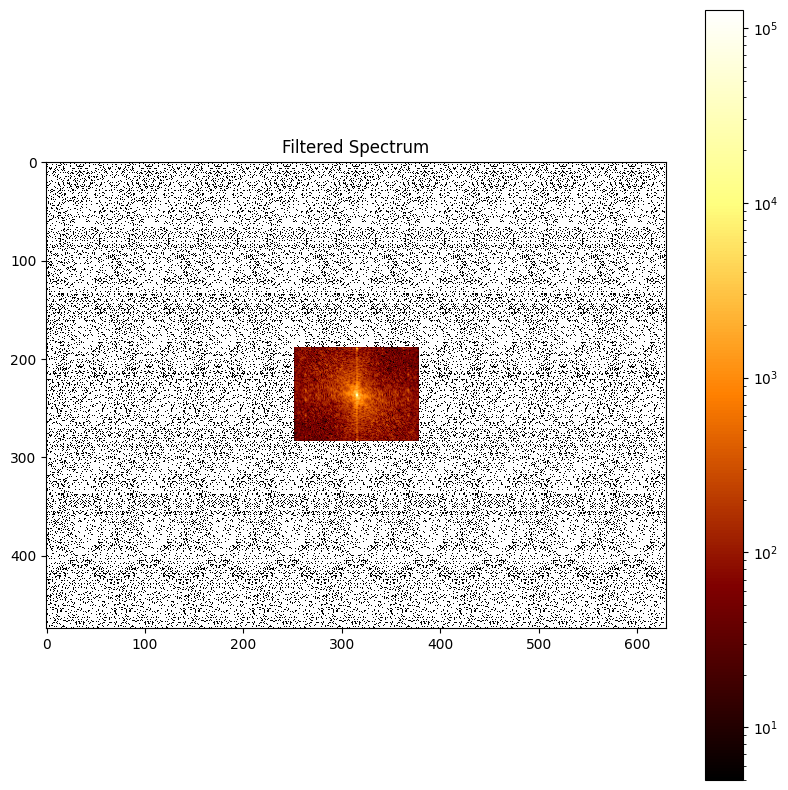

In [30]:
'''Ảnh đầu ra là phổ được lọc với LPF'''

# Copy the original spectrum and truncate coefficients.
# Define the fraction of coefficients (in each direction) to keep as
keep_fraction = 0.1
im_fft2 = im_fft.copy()
# Set r and c to the number of rows and columns of the array.
r, c = im_fft2.shape
# Set all rows to zero with indices between r*keep_fraction and r*(1- keep_fraction)
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
# Similarly with the columns
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0
pylab.figure(),
plot_spectrum(fftpack.fftshift(im_fft2)),pylab.title('Filtered Spectrum')

### PHỤC DỰNG HÌNH ẢNH


Text(0.5, 1.0, 'Reconstructed Image')

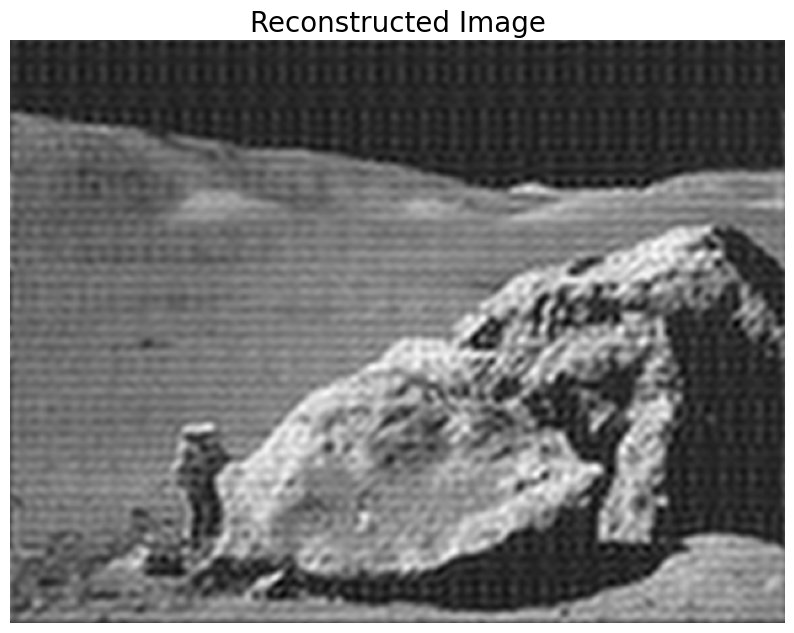

In [ ]:
'''Hình ảnh đầu ra rõ nét hơn so với ảnh gốc được lọc trong miền tần số'''
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
im_new = fp.ifft2(im_fft2).real
pylab.figure(figsize=(10,10)), pylab.imshow(im_new, pylab.cm.gray),
pylab.axis('off')
pylab.title('Reconstructed Image', size=20)